Starting point:

https://nbviewer.org/urls/qutip.org/qutip-tutorials/tutorials-v4/time-evolution/006_photon_birth_death.ipynb

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

# fock space size
N = 5
# Destroy operator
a = destroy(N)
# oscillator Hamiltonian
H = a.dag() * a
# Initial Fock state with one photon
psi0 = basis(N, 1)

kappa = 1.0 / 0.129  # Coupling rate to heat bath
nth = 0.0  # Temperature with <n>=0.063

# collapse operators for the thermal bath
c_ops = []
c_ops.append(np.sqrt(kappa * (1 + nth)) * a)
c_ops.append(np.sqrt(kappa * nth) * a.dag())

ntraj = [1, 5, 15, 904]  # number of MC trajectories
tlist = np.linspace(0, 0.8, 100)

# Solve using MCSolve for different ntraj
mc = mcsolve(H, psi0, tlist, c_ops, [a.dag() * a], ntraj)
me = mesolve(H, psi0, tlist, c_ops, [a.dag() * a])

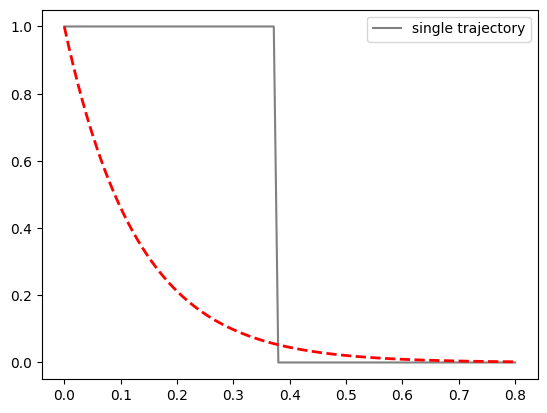

In [12]:
plt.plot(tlist, mc.expect[0][0],'grey', label="single trajectory")
plt.plot(tlist, me.expect[0], "r--", lw=2)
plt.legend()

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

# fock space size
N = 20
# Destroy operator
a = destroy(N)
# oscillator Hamiltonian
H = a.dag() * a
# Initial Fock state with 5 photons
psi0 = coherent(N, 3)

kappa = 1.0 / 0.129  # Coupling rate to heat bath
nth = 0.0  # Temperature with <n>=0.063

# collapse operators for the thermal bath
c_ops = []
c_ops.append(np.sqrt(kappa * (1 + nth)) * a)
c_ops.append(np.sqrt(kappa * nth) * a.dag())

ntraj = [1, 5, 15, 904]  # number of MC trajectories
tlist = np.linspace(0, 0.8, 100)

# Solve using MCSolve for different ntraj
mc = mcsolve(H, psi0, tlist, c_ops, [a.dag() * a], ntraj)
me = mesolve(H, psi0, tlist, c_ops, [a.dag() * a])

10.1%. Run time:   0.28s. Est. time left: 00:00:00:02
20.0%. Run time:   0.50s. Est. time left: 00:00:00:02
30.1%. Run time:   0.74s. Est. time left: 00:00:00:01
40.0%. Run time:   0.95s. Est. time left: 00:00:00:01
50.0%. Run time:   1.16s. Est. time left: 00:00:00:01
60.1%. Run time:   1.38s. Est. time left: 00:00:00:00
70.0%. Run time:   1.61s. Est. time left: 00:00:00:00
80.1%. Run time:   1.81s. Est. time left: 00:00:00:00
90.0%. Run time:   2.02s. Est. time left: 00:00:00:00
100.0%. Run time:   2.22s. Est. time left: 00:00:00:00
Total run time:   2.23s


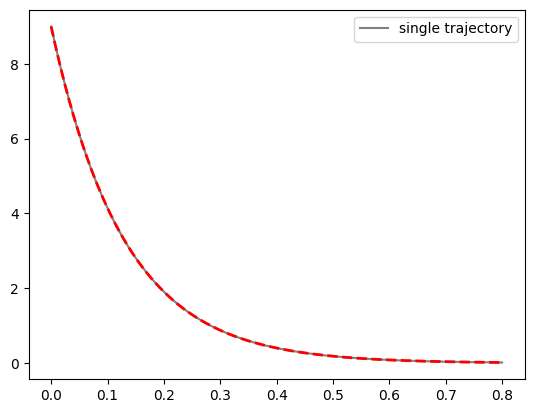

In [25]:
plt.plot(tlist, mc.expect[0][0],'grey', label="single trajectory")
plt.plot(tlist, me.expect[0], "r--", lw=2)
plt.legend()

OK, this gives nonsense. What if I also add in a photon number collapse operator? 

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

# fock space size
N = 20
# Destroy operator
a = destroy(N)
# oscillator Hamiltonian
H = a.dag() * a
# Initial Fock state with 5 photons
psi0 = coherent(N, 3)

kappa_decay = 1.0 / 0.129  
kappa_meas = kappa_decay*10

# decay and measurement
c_ops = []
c_ops.append(np.sqrt(kappa_decay) * a)
c_ops.append(np.sqrt(kappa_meas) * a*a.dag())


ntraj = [1, 5, 15, 904]  # number of MC trajectories
tlist = np.linspace(0, 0.8, 1000)

# Solve using MCSolve for different ntraj
mc = mcsolve(H, psi0, tlist, c_ops, [a.dag() * a], ntraj)
me = mesolve(H, psi0, tlist, c_ops, [a.dag() * a])

10.1%. Run time:   5.55s. Est. time left: 00:00:00:49
20.0%. Run time:  10.39s. Est. time left: 00:00:00:41
30.1%. Run time:  15.97s. Est. time left: 00:00:00:37
40.0%. Run time:  21.05s. Est. time left: 00:00:00:31
50.0%. Run time:  26.09s. Est. time left: 00:00:00:26
60.1%. Run time:  31.04s. Est. time left: 00:00:00:20
70.0%. Run time:  36.23s. Est. time left: 00:00:00:15
80.1%. Run time:  41.23s. Est. time left: 00:00:00:10
90.0%. Run time:  46.60s. Est. time left: 00:00:00:05
100.0%. Run time:  51.54s. Est. time left: 00:00:00:00
Total run time:  51.55s


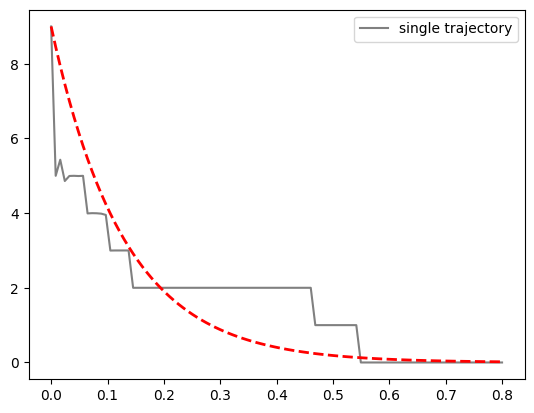

In [27]:
plt.plot(tlist, mc.expect[0][0],'grey', label="single trajectory")
plt.plot(tlist, me.expect[0], "r--", lw=2)
plt.legend()

Looks reasonable, and like the experiment. However, no quantum zeno, which I would perhaps naively expect since I am collapsing 10 times faster than I am decaying. 

# Quantum zeno with qubit measurement

This is the one that confused me a while ago. I would expect to be able to zeno things using sigma_z: 

https://docs.qojulia.org/examples/quantum-zeno-effect/#Quantum-Zeno-Effect

Let's try a TLS and then compare Rabi oscillations and decay. And see if we get a trajectory that makes sense. 

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

eps = 1
H = eps*sigmax()
psi0 = basis(2,1)

kappa_meas = 1
c_ops = []
c_ops.append(np.sqrt(kappa_meas) * sigmaz())

ntraj = [1, 5, 15, 904]  # number of MC trajectories
tlist = np.linspace(0, 5, 1000)

p1 = projection(2,1,1)

me1 = mesolve(H, psi0, tlist, [], p1)
me2 = mesolve(H, psi0, tlist, c_ops, p1)
mc = mcsolve(H, psi0, tlist, c_ops)

10.0%. Run time:   0.39s. Est. time left: 00:00:00:03
20.0%. Run time:   0.58s. Est. time left: 00:00:00:02
30.0%. Run time:   0.78s. Est. time left: 00:00:00:01
40.0%. Run time:   0.98s. Est. time left: 00:00:00:01
50.0%. Run time:   1.18s. Est. time left: 00:00:00:01
60.0%. Run time:   1.39s. Est. time left: 00:00:00:00
70.0%. Run time:   1.58s. Est. time left: 00:00:00:00
80.0%. Run time:   1.78s. Est. time left: 00:00:00:00
90.0%. Run time:   1.99s. Est. time left: 00:00:00:00
100.0%. Run time:   2.19s. Est. time left: 00:00:00:00
Total run time:   2.23s


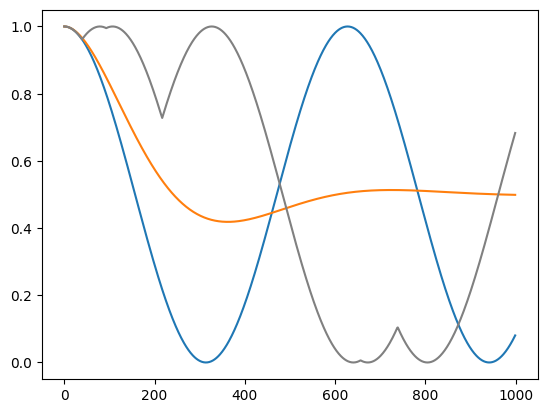

In [64]:
plt.plot(me1.expect[0])
plt.plot(me2.expect[0])
plt.plot(expect(p1,mc.states[0]), 'gray')

Nope!!!